# 多项式曲线拟合

要拟合的曲线为：<br>
$y=2.4x^3+3x^2+0.5x+0.9$<br>

我们给定如下公式：<br>
$$\begin{bmatrix}
x_{0}^{3} & x_{0}^{2}& x_0 \\
x_{1}^{3} & x_{1}^{2}& x_1 \\
. & . & .\\
x_{n}^{3} & x_{n}^{2}& x_n \\
\end{bmatrix} \cdot W + b = y$$

其中：<br>
$$W=
\begin{bmatrix}
w_0 \\
w_1 \\
w_2 
\end{bmatrix}
$$

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 生成数据

In [92]:
N = 100
x = torch.FloatTensor(np.linspace(-1,1,100)).unsqueeze(1)
X = torch.cat([x**i for i in range(1,4)],1)

In [93]:
W_true = torch.FloatTensor([0.5,3,2.4]).unsqueeze(1)
b_true = torch.FloatTensor([0.9])


In [113]:
y = torch.mm(X,W_true) + b_true
#y_label = y + (torch.randn(N).unsqueeze(1))*0.21
y_label = y

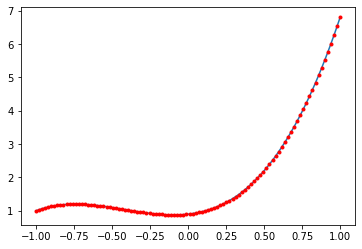

In [114]:
plt.plot(x.numpy(),y.numpy())
plt.plot(x.numpy(),y_label.numpy(),'r.')
plt.show()

## 实现方式一：pytorch

In [115]:
W = torch.randn(3).unsqueeze(1)
W.requires_grad_(True)
b = torch.randn(1)
b.requires_grad_(True)

tensor([-1.7390], requires_grad=True)

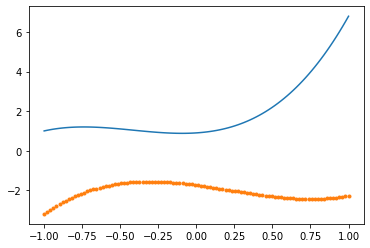

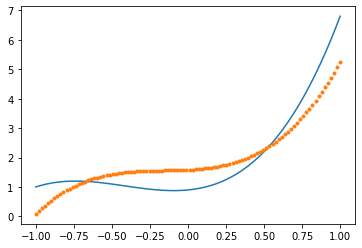

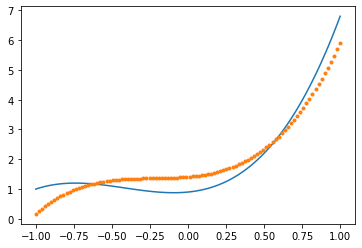

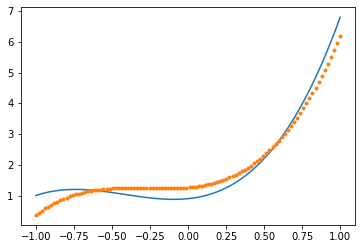

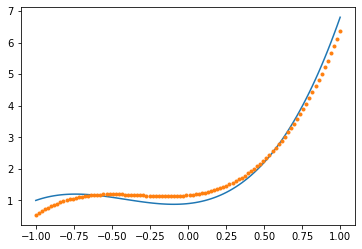

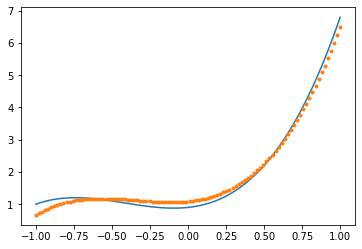

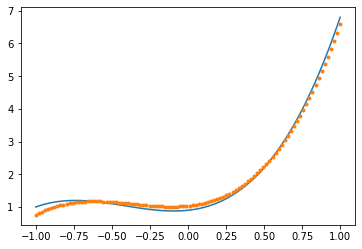

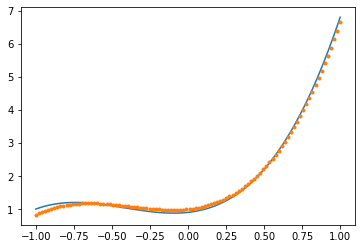

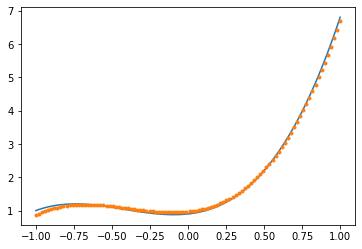

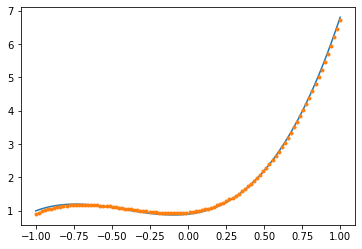

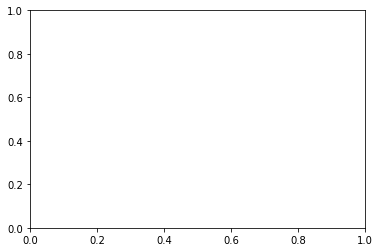

In [116]:
learning_rate = 1e-1
loss_func = torch.nn.MSELoss()
for i in range(200):
    output = torch.mm(X,W) + b
    
    # loss
    #loss = 1/N * torch.sum((output-y_label)**2)
    loss = loss_func(output,y_label)
    loss.backward()
    
    with torch.no_grad():
        # update
        plt.cla()
        W -= learning_rate * W.grad
        b -= learning_rate * b.grad        
        W.grad.zero_()
        b.grad.zero_()
        if i%20 == 0:
            plt.plot(x.numpy(),y.numpy())
            plt.plot(x.data.numpy(),output.data.numpy(),'.')
            plt.pause(0.1)

In [117]:
print(W)

tensor([[0.4821],
        [2.9033],
        [2.4278]], requires_grad=True)


## 实现方式二

In [118]:
W = torch.randn(3).unsqueeze(1)
b = torch.randn(1)

tensor(5.8401)


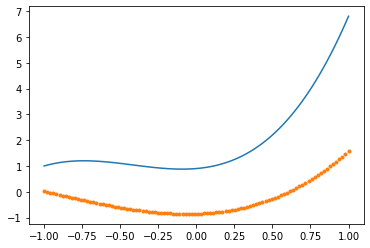

tensor(0.0601)


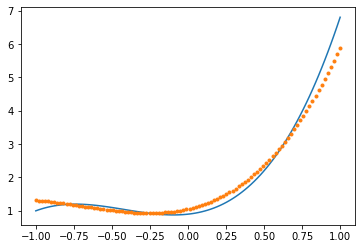

tensor(0.0339)


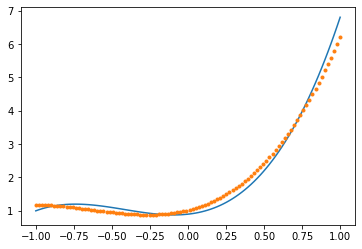

tensor(0.0258)


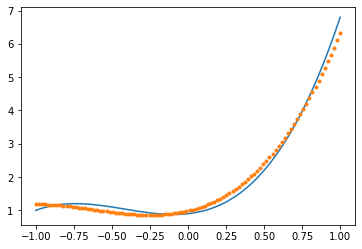

tensor(0.0207)


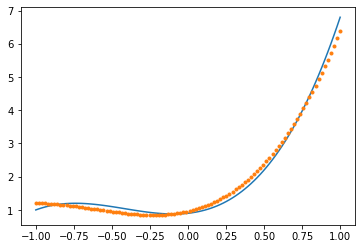

tensor(0.0171)


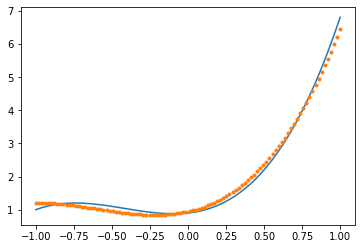

tensor(0.0144)


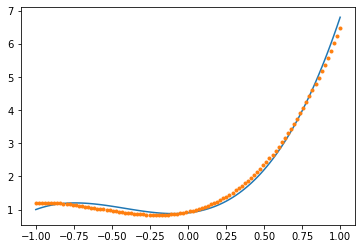

tensor(0.0123)


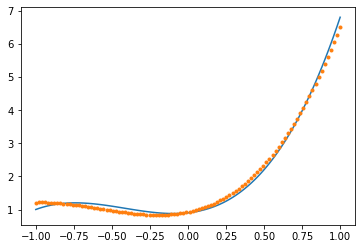

tensor(0.0106)


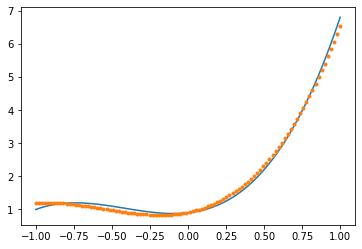

tensor(0.0091)


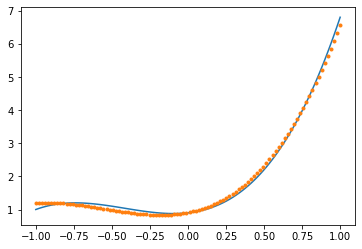

In [122]:
learning_rate = 1e-1
for i in range(200):
    output = torch.mm(X,W) + b
    
    # loss
    loss = 1/N * torch.sum((output-y_label)**2)
    # gradient
    dy = 1/N * 2 * (output - y_label)
    dW = torch.mm(X.t(),dy)
    db = torch.sum(dy)
    
    # update
    W -= learning_rate*dW
    b -= learning_rate*db

    if i%20==0:
        print(loss)
        plt.cla()
        plt.plot(x.numpy(),y.numpy())
        plt.plot(x.data.numpy(),output.data.numpy(),'.')
        plt.pause(0.1)